In [1]:
library(ggseqlogo)
library(ggplot2)
library(patchwork)

In [2]:
read_nptxt_matrix <- function(fname) {
    d=read.table(fname)
    colnames(d) = c("A", "C", "G", "T")
    t(d)
}

In [3]:
revcomp <- function(x) {
    x = x[rev(seq(nrow(x))), rev(seq(ncol(x)))]
    rownames(x) = c("A", "C", "G", "T")
    x
}

In [7]:
trim_and_plot <- function(m, rc=F, trim_left=0, trim_right=0, method='bits', ymin=0, ymax=2, title=NULL) {
    if (rc) {
        m = revcomp(m)                
    }

    #m = m[, trim_left:(ncol(m)-trim_right)]
    #m

    rownames(m) = c("A","C","G","T")
    
    f="helvetica_bold"
    p <- ggseqlogo(m, method="bits", font=f, ncol=1, size=20) + 
                                    ylim(c(ymin,ymax)) +
                                    theme_void() 
    
    if (!is.null(title)) {
        p = p 
        #p = p + theme(plot.margin=unit(c(-0.5,1,1,1),"cm"))
        #p = p + theme(plot.title = element_text(hjust = 0.5, size=20))
    }
    
    p
}

In [12]:
get_plots <- function(subcluster_base_path, input_ls, annotations, rc=F, trim_left=0, trim_right=0, first_yaxis=F, ymax=None ,ymin=None) {
    transient_plots = list()
    num_instances_per_motif = 5
    i = 1
    
    for (x in input_ls) {

        submotif = read_nptxt_matrix(sprintf(subcluster_base_path, x))

        #print(submotif)
        print(max(submotif))
        print(min(submotif))
 
        textn = annotations[annotations["key"]==sprintf("0_%s",x)][2]
        transient_plots[[i]] = trim_and_plot(submotif, rc, trim_left, trim_right, method='custom',
                                         ymin=ymin, ymax=ymax)

        #transient_plots[[i]] = trim_and_plot(submotif, rc, trim_left, trim_right)

        transient_plots[[i]] = transient_plots[[i]]  +
                                    annotate('text', 
                                             x=ncol(submotif), 
                                             y=max(submotif), 
                                             size=4,
                                             label=sprintf("%.2f",as.numeric(textn))
                                             )
        #theme(plot.margin = unit(c(0,0,0,0), "pt"))
        transient_plots[[i]]


        i = i +1
        }
        
        
    transient_plots

}

[1] 0.068764
[1] 0.00125


Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”


[1] 0.073584
[1] -0.000219


Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”


[1] 0.092039
[1] -0.002391


Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”


[1] 0.080473
[1] -0.000841


Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”


[1] 0.053594
[1] -0.000309


Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”


[1] 0.083673
[1] -0.001421


Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”


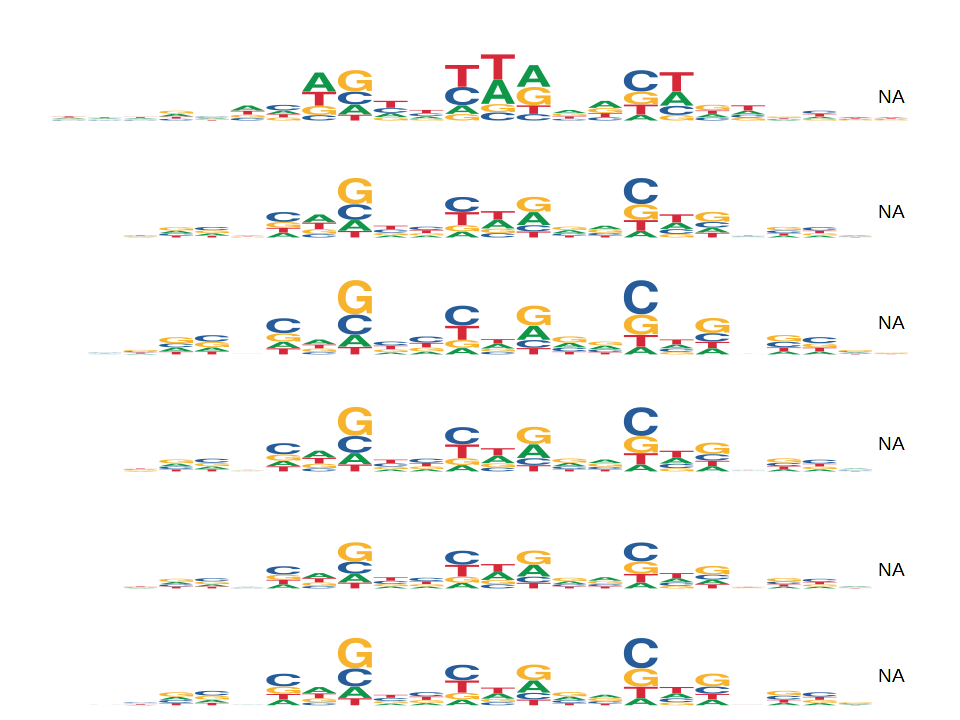

In [18]:

options(repr.plot.width = 8, repr.plot.height = 6)

atac_annotations = read.table("bias_motifs_invivo/profile_tn5.counts.csv",sep=",", header=TRUE)

all_plots = get_plots("bias_motifs/ATAC/profile_0_%s_tn5.pfm", c('nak',"gm", "hep", "imr", "h1e", "k56"), atac_annotations,
                       rc=F, trim_left=0, trim_right=0, first_yaxis = F, ymax=0.3, ymin=0)
#do.call(gridExtra::grid.arrange, c(all_plots, ncol=1))

wrap_plots(all_plots, ncol=1)

ggsave("bias_motifs/ATAC/tn5_pwm_summary.pdf", device = "pdf",  width = 8, height = 6, dpi = 300)
